# HW11

### Jingheng Huan
jh730

Q1: Perform both the Kruskal’s and Prim’s algorithms on the following graph.
Show your solutions step by step.

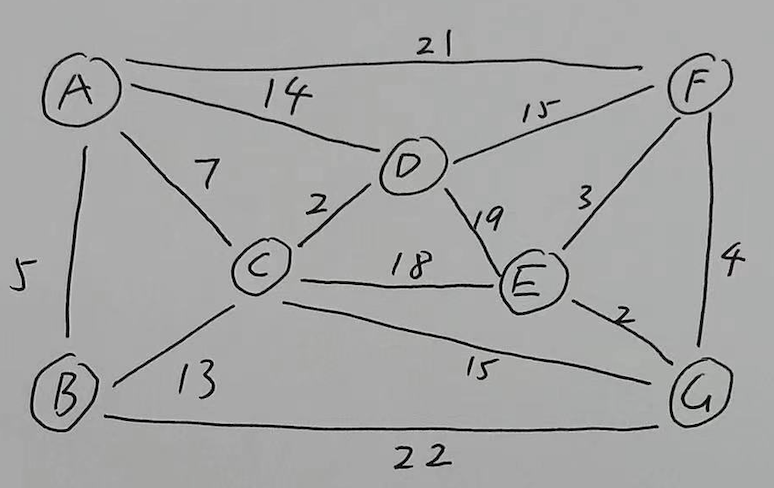

In [7]:
from IPython.display import Image, display

display(Image(filename='HW11Q1.png'))

# Kruskal's Algorithm

- **Step 1**: Add the smallest edges (C-D) and (E-G) to the MST.
- **Step 2**: Add the next smallest edge (E-F) to the MST.
- **Step 3**: We can't add the next smallest edge (F-G), which form a cycle.
- **Step 4**: Add the next smallest edge (A-B) to the MST.
- **Step 5**: Add the next smallest edge (A-C) to the MST.
- **Step 6**: We can't add the next smallest edge (B-C), which form a cycle.
- **Step 7**: We can't add the next smallest edge (A-D), which form a cycle.
- **Step 8**: Add the next smallest edge (D-F) to the MST.
- **Step 9**: We have now reached the required number of edges for the MST, which is (7-1) = 6, where 7 is the number of vertices. Therefore, we do not need to consider other edges.

**The resulting edges of the MST using Kruskal's Algorithm:**
The MST contains the edges: (A-B), (A-C), (C-D), (D-F), (F-E), and (E-G), the total cost is 34.

# Prim's Algorithm

**Starting at A**:
- **Step 1**: Choose edge (A-B), the smallest connecting edge from A.
- **Step 2**: Choose edge (A-C), the smallest connecting edge from A.
- **Step 3**: Choose edge (C-D), the smallest connecting edge from C. 
- **Step 4**: Choose edge (D-F), the smallest connecting edge from D.
- **Step 5**: Choose edge (F-E), the smallest connecting edge from F.
- **Step 6**: Choose edge (E-G), the smallest connecting edge from E.
- **Step 7**: We have now reached the required number of edges for the MST, which is (7-1) = 6, where 7 is the number of vertices. Therefore, we do not need to consider other edges.

**The resulting edges of the MST using Prim's Algorithm:**
The MST contains the edges: (A-B), (A-C), (C-D), (D-F), (F-E), and (E-G), the total cost is 34.

Q2: Introduce a linear running time algorithm for finding MSTs on any
undirected graph with only two weight options, either w = 10 or w = 20.

# Pseudocode
- Create two empty lists, edges 10 and edges 20.
- Iterate over all edges in the given graph:
    - If the weight of the edge is 10, then we add it to edges 10.
    - If the weight of the edge is 20, then we add it to edges 20.
- Create an empty graph, MST.
- Iterate over list edges 10:
    - If adding the edge to the MST does not form a cycle, then add it to the MST.
- Iterate over list edges 20:
    - If adding the edge to the MST does not form a cycle, then add it to the MST.
- Return the MST.

This algorithm has a linear running time complexity of O(E), where E is the number of edges in the graph. We only iterate over two edge lists, and checking if adding an edge would create a cycle can be done in contant time.

Q3: Implement the Bellman-Ford algorithm using an array list. Test your
implementation with at least 3 shortest path problem instances, you come up with.

In [8]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w]) # u = source, v = destination, w = weight

    def printArr(self, dist):
        print("Vertex   Distance from Source")
        for i in range(self.V):
            print(f"{i}\t\t{dist[i]}")

    def BellmanFord(self, src):
        dist = [float("Inf")] * self.V
        dist[src] = 0

        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        self.printArr(dist)

In [9]:
# Test 1
g1 = Graph(5)
g1.addEdge(0, 1, -1)
g1.addEdge(0, 2, 4)
g1.addEdge(1, 2, 3)
g1.addEdge(1, 3, 2)
g1.addEdge(1, 4, 2)
g1.addEdge(3, 2, 5)
g1.addEdge(3, 1, 1)
g1.addEdge(4, 3, -3)
g1.BellmanFord(0)

Vertex   Distance from Source
0		0
1		-1
2		2
3		-2
4		1


In [10]:
# Test 2
g2 = Graph(4)
g2.addEdge(0, 1, 5)
g2.addEdge(0, 2, 4)
g2.addEdge(1, 3, 3)
g2.addEdge(2, 1, -6)
g2.addEdge(3, 2, 2)
g2.BellmanFord(0)

Graph contains negative weight cycle


In [11]:
# Test 3
g3 = Graph(6)
g3.addEdge(0, 1, 1)
g3.addEdge(0, 2, 2)
g3.addEdge(1, 3, 3)
g3.addEdge(2, 3, 4)
g3.addEdge(3, 4, 5)
g3.addEdge(4, 5, 6)
g3.BellmanFord(0)

Vertex   Distance from Source
0		0
1		1
2		2
3		4
4		9
5		15


Q4: Dis/-prove that the Dijkstra’s algorithm results in a shortest path tree
which is always an MST.

Dijkstra's algorithm and the concept of a Minimum Spanning Tree (MST) solve two different problems and they do not always produce the same result. Dijkstra's algorithm constructs a Shortest Path Tree (SPT) is not necessarily a Minimum Spanning Tree. Dijkstra's algorithm is concerned with the shortest path from one node to all others, while an MST is concerned with the shortest path between all nodes in the graph. Here is the example that they are different.

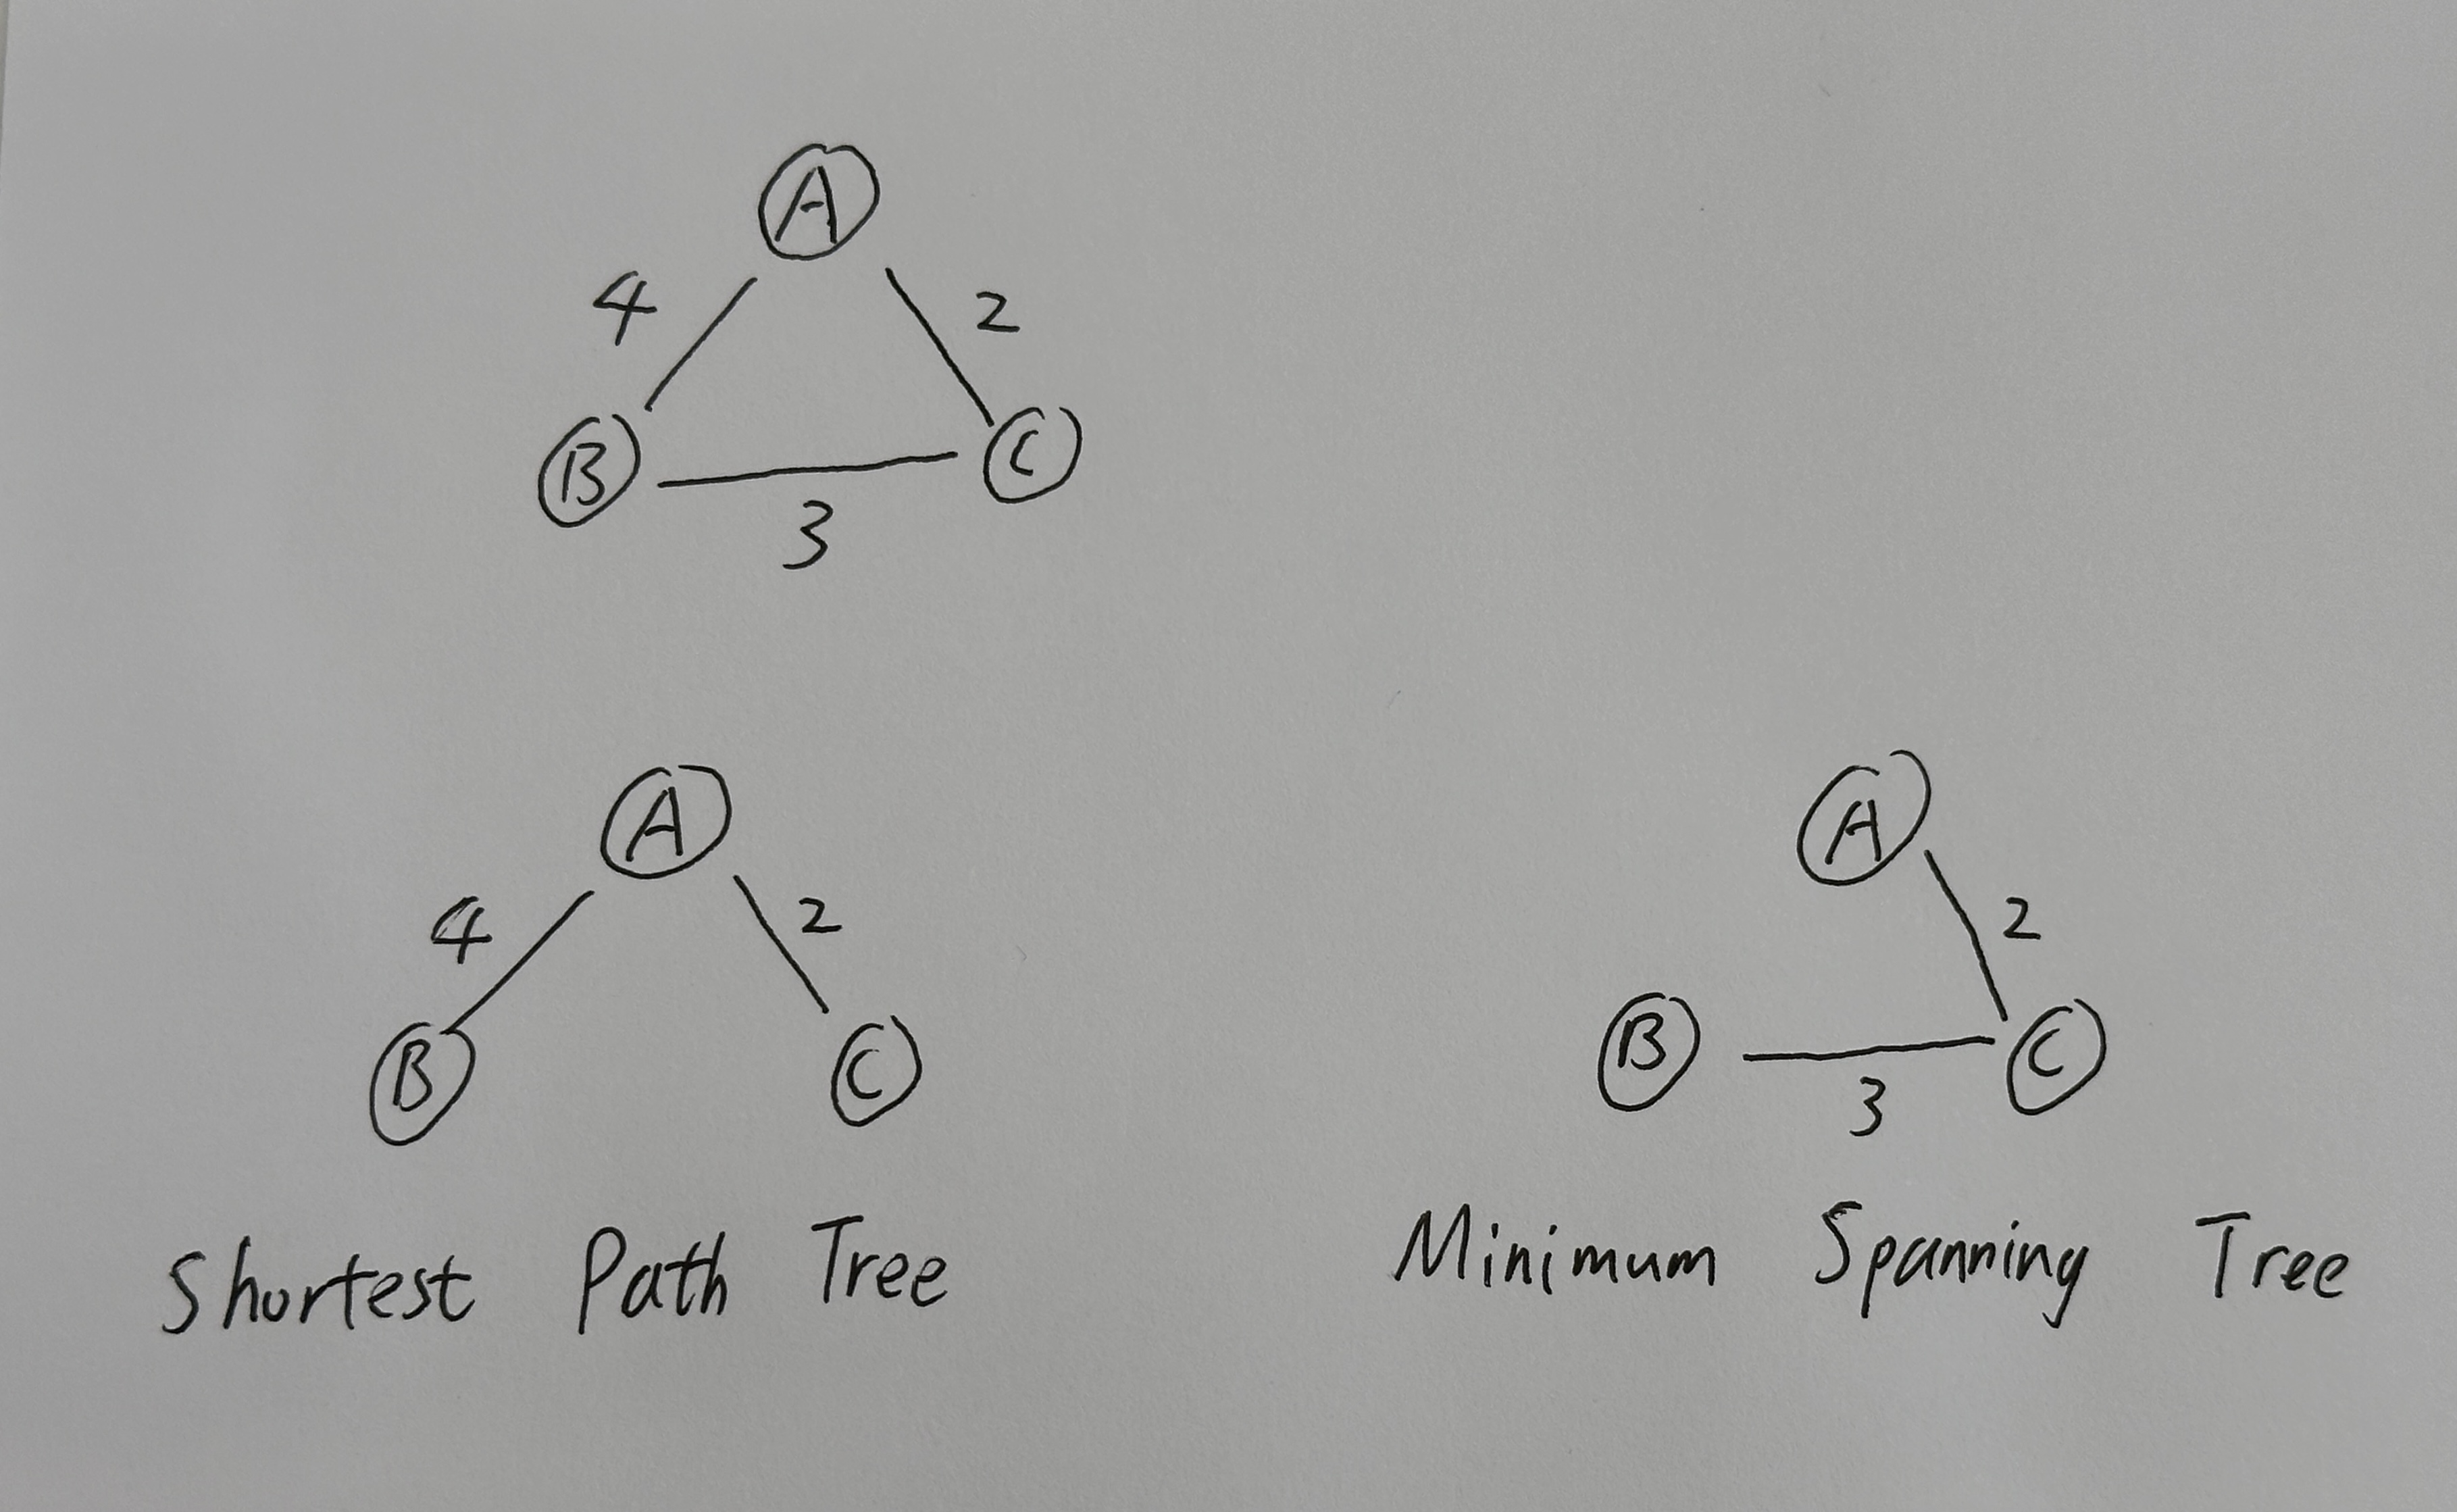

In [12]:
display(Image(filename='HW11Q4.jpg'))

Q5: Suggest an approach utilizing Breadth-First Search (BFS), that can explore
the shortest paths as the Dijkstra’s algorithm does.

- Create an empty graph, G'.
- For each edge (u, v) with weight w in the original graph G:
    - Add a node u' to G'
    - For i from 1 to w:
        - Add a new node v_i' to G'
        - Add an edge (u', v_i') to G' with weight 1
        - Set u' = v_i'
    - Add an edge (u', v) to G' with weight 1
- Run BFS on G' starting from the source node s.

I think this approach will significantly increase the size of the graph, especially if the weights of edges are big.